In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
    
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from umap import UMAP

In [3]:
df_train = pd.read_csv("data/fashion-mnist_train.csv")
df_test = pd.read_csv("data/fashion-mnist_test.csv")

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
images_train = df_train.drop(columns=["label"]).values.astype(float)

In [7]:
images_train /= 255.0

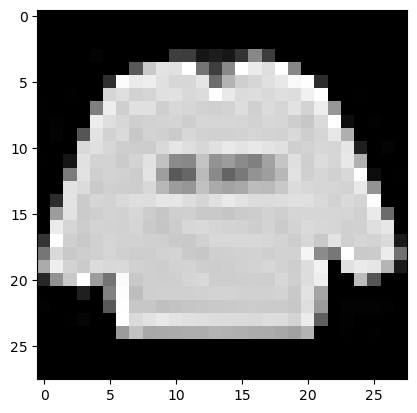

In [8]:
plt.imshow(images_train[0].reshape(28, 28), cmap="gray")

In [11]:
pca = PCA(n_components=0.95)
pca.fit(images_train)

,n_components,0.95
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [23]:
print(pca.explained_variance_ratio_)

[0.29011353 0.17727668 0.060227   0.04970272 0.03839289 0.03470997
 0.02344044 0.01913937 0.01343605 0.01310725 0.0098979  0.0091405
 0.00765206 0.00660427 0.00609188 0.00591506 0.00552046 0.0053049
 0.00459959 0.00455534 0.00432823 0.00406103 0.00383469 0.00374221
 0.00361877 0.0035091  0.00333586 0.00318696 0.00309619 0.00295278
 0.00276008 0.00265339 0.00262962 0.0025768  0.0024756  0.00238413
 0.00230075 0.00224349 0.00219128 0.00209739 0.00200786 0.00197572
 0.00194214 0.00183776 0.00175782 0.0017155  0.00168051 0.00163924
 0.00162221 0.00156039 0.00153962 0.00150809 0.00147632 0.00142855
 0.00138375 0.00137028 0.00130995 0.00129031 0.00127057 0.00126083
 0.00122874 0.00120787 0.00118018 0.00116346 0.0011529  0.0011201
 0.00111493 0.00109534 0.00106029 0.00104935 0.00103992 0.0010226
 0.00097369 0.0009554  0.00093832 0.00093564 0.00093271 0.00090589
 0.000892   0.00086959 0.00085515 0.00084408 0.00082857 0.00081828
 0.00081371 0.00080268 0.00077604 0.00077178 0.0007625  0.00075458

In [15]:
pca_images = pca.transform(images_train)

In [18]:
pca_recon = pca.inverse_transform(pca_images)

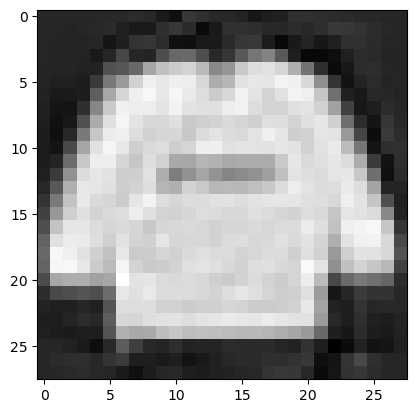

In [20]:
plt.imshow(pca_recon[0].reshape(28, 28), cmap="gray")

In [26]:
tsne = TSNE(n_components=2)
images_tsne = tsne.fit_transform(images_train)

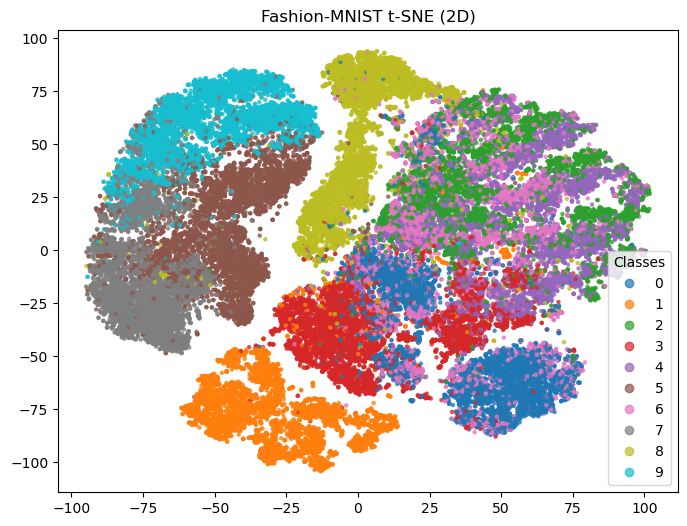

In [29]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(images_tsne[:,0], images_tsne[:,1], c=df_train["label"], cmap="tab10", s=5, alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("Fashion-MNIST t-SNE (2D)")
plt.show()

In [39]:
images_train_sample = images_train[:20000]

In [40]:
isomap = Isomap(n_components=2)
images_isomap = isomap.fit_transform(images_train_sample)

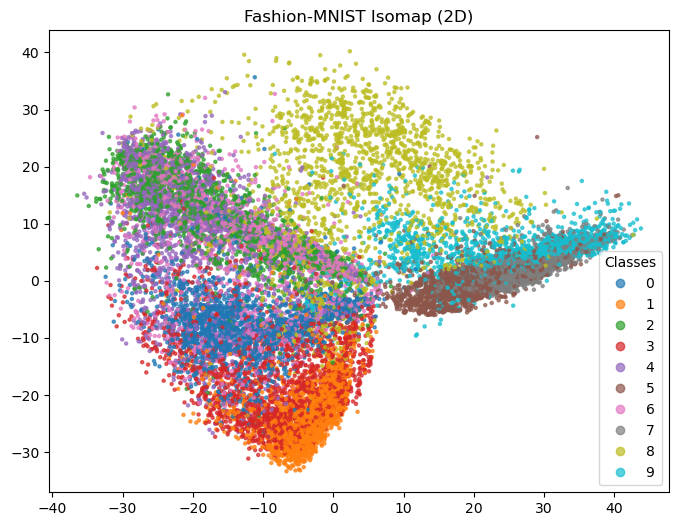

In [42]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(images_isomap[:,0], images_isomap[:,1], c=df_train["label"][:20000], cmap="tab10", s=5, alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("Fashion-MNIST Isomap (2D)")
plt.show()

In [46]:
umap = UMAP(n_components=2)
images_umap = umap.fit_transform(images_train)

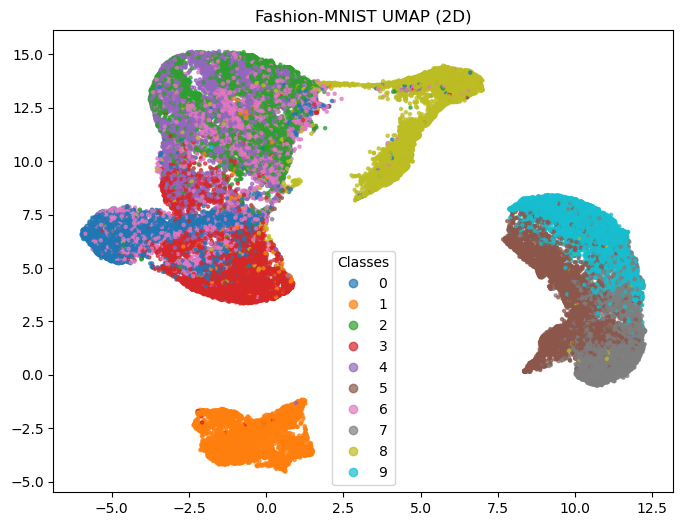

In [47]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(images_umap[:,0], images_umap[:,1], c=df_train["label"], cmap="tab10", s=5, alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("Fashion-MNIST UMAP (2D)")
plt.show()